In [276]:
import pandas as pd
import numpy as np
#3 external impacts
#Factor in 2008/2009 housing market bubble burst.
#Inflation
#Loan Interest and availability, Mortgage-backed security etc. 
#Remove:

In [277]:
HousePrice = pd.read_csv("train.csv", index_col = 0)
HousePrice.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [278]:
HousePrice["YrSold"].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [268]:
HousePrice.describe()
missingCols = HousePrice.isnull().any(axis=0)
print('The columns with missingness are %s' %(HousePrice.columns[missingCols]))

The columns with missingness are Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [54]:
HousePrice.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [55]:
hp1.head(5)
hp1['MSSubClass'].value_counts()
#Since 20 is the most dominant one, we decide to drop this column to avoid multicollinearity

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [56]:
hp1.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000


In [279]:
hp1 = HousePrice.iloc[:,0:21]
missingCols = hp1.isnull().any(axis=0)
print('The columns with missingness are %s' %(hp1.columns[missingCols]))

The columns with missingness are Index(['LotFrontage', 'Alley'], dtype='object')


In [280]:
hp2 = pd.get_dummies(hp1['MSSubClass'], prefix='MSSubClass', dummy_na=True)
hp2.head(5)

,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSSubClass_nan
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [281]:
hp3 = pd.concat([hp1,hp2], axis = 1, join = 'inner')
#del(hp3['MSSubClass'])
#del(hp3['MSSubClass_20'])
hp3.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSSubClass_nan
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,1,0,0,0,0,0,0,0,0,0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0


In [282]:
hp4 = pd.get_dummies(hp1['MSZoning'], prefix='MSZoning')
hp5 = pd.concat([hp3,hp4], axis = 1, join = 'inner')
hp5.head(5)
#del(hp5['MSZoning_RL'])
#del(hp5['MSZoning'])
hp5.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MSSubClass_120.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSSubClass_nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,1,0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,1,0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,1,0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,1,0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E113BBE80>]],
      dtype=object)

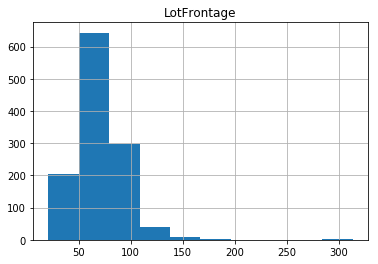

In [107]:
hp5.hist(column='LotFrontage')

In [112]:
hp5['LotFrontage'].isna().sum()

259

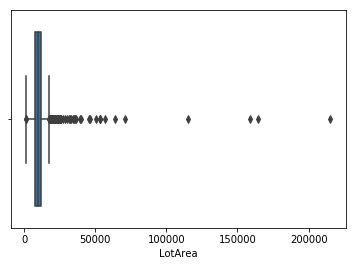

In [113]:
import seaborn as sns
sns.boxplot(x=hp5['LotArea'])
#Ugly Outlier

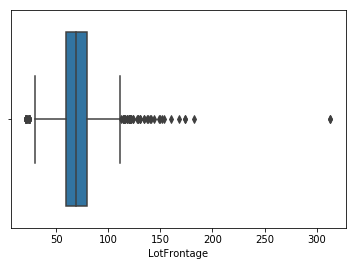

In [118]:
sns.boxplot(x=hp5['LotFrontage'])
#Ugly Outlier need group opinion and concensus.

In [283]:
hp6 = pd.get_dummies(hp1['Street'], prefix='Street', dummy_na = True)
hp6.head()

,Street_Grvl,Street_Pave,Street_nan
Id,,,
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


In [273]:
hp1['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [284]:
hp7 = pd.get_dummies(hp1['Alley'], prefix = 'Alley', dummy_na = True)
#A lot of NAN. No need to drop anything. When both columns 0,0 = NAN, meaning not have alley.

In [160]:
hp1['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [285]:
hp8 = pd.get_dummies(hp1['LotShape'], prefix = 'LotShape', dummy_na = True)
hp8.head()

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan
Id,,,,,
1,0,0,0,1,0
2,0,0,0,1,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0


In [286]:
hp9 = pd.get_dummies(hp1['LandContour'], prefix = 'LandContour')
#del(hp9['LandContour_Lvl'])
hp9.head()
#Drop lvl most dominant

,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
Id,,,,
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1


In [ ]:
pd.get_dummies(hp1[])
#Utilities
#AllPub    1459
#NoSeWa       1
#Should we just delete This column?????

In [287]:
hp10 = pd.get_dummies(hp1['LotConfig'], prefix = 'LotConfig', dummy_na = True)
#del(hp10['LotConfig_Inside'])
hp10.head()

,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan
Id,,,,,,
1,0,0,0,0,1,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,1,0,0,0,0,0
5,0,0,1,0,0,0


In [288]:
hp11 = pd.get_dummies(hp1['Condition1'], prefix = 'Condition1', dummy_na = True)
#del(hp11['Condition1_Norm'])
hp11.head()
#Delete Normal Codition out b/c most dominant

,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan
Id,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0


In [289]:
hp12 = pd.get_dummies(hp1['Condition2'], prefix = 'Condition2', dummy_na = True)
#del(hp12['Condition2_Norm'])
hp12.head()
#Delete Normal Codition out b/c most dominant

,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan
Id,,,,,,,,,
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0


In [167]:
hp1['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [290]:
#Should we drop the subclass? Because the column basically describe the specification that other variables are describing.
hp13 = pd.get_dummies(hp1['BldgType'], prefix = 'BldgType', dummy_na = True)
hp13.head()
#Drop 1 Fam

,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan
Id,,,,,,
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,1,0,0,0,0,0


In [166]:
hp1['HouseStyle'].value_counts()
#Drop1story

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [291]:
hp14 = pd.get_dummies(hp1['HouseStyle'], prefix = 'HouseStyle', dummy_na = True)
#del(hp14['HouseStyle_1Story'])
hp14.head()

,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan
Id,,,,,,,,,
1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0,0


In [171]:
#'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','RoofStyle']

In [175]:
hp1['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [292]:
hp15 = pd.get_dummies(hp1['OverallQual'], prefix = 'OverallQual', dummy_na = True)
#Should I drop 5? It is not dominant. I think we should group 1 and 2 together because it is minority.

In [178]:
hp1['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [293]:
hp16 = pd.get_dummies(hp1['OverallCond'], prefix = 'OverallCond', dummy_na = True)
#I will drop 5, but should I join 1 and 2 together?????

In [202]:
#hp1['Remodel_or_not'] = hp1['YearRemodAdd'] - hp1['YearBuilt']
#hp1['Remodel_or_not'].loc[hp1['Remodel_or_not'] > 0] = 1
#hp17 = hp1['YearBuilt']
#hp18 = hp1['Remodel_or_not']
#hp18.head(5)    

C:\Users\Bird_\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Id
1    0
2    0
3    1
4    1
5    0
Name: Remodel_or_not, dtype: int64

In [207]:
#hp1['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [294]:
hp1['RoofStyle'].value_counts()
hp19 = pd.get_dummies(hp1['RoofStyle'], prefix = 'RoofStyle', dummy_na = True)
#del(hp19['RoofStyle_Gable'])
hp19.head(5)

,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan
Id,,,,,,,
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0


In [295]:
hp1['LandSlope'].value_counts()
hp20 = pd.get_dummies(hp1['LandSlope'], prefix = 'LandSlope', dummy_na = True)
#del(hp20['LandSlope_Gtl'])
hp20.head(5)

,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandSlope_nan
Id,,,,
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0


In [220]:
hp1['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [296]:
hp21 = pd.get_dummies(hp1['Neighborhood'], prefix = 'Neighborhood', dummy_na = True)
#del(hp21['Neighborhood_NAmes'])
hp21.head(5)

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [310]:
hp_total1 = pd.concat([hp5,hp6,hp7,hp8,hp9,hp10,hp11,hp12,hp13,hp14,hp19,hp20,hp21], axis = 1)
list(hp_total1)

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'MSSubClass_20.0',
 'MSSubClass_30.0',
 'MSSubClass_40.0',
 'MSSubClass_45.0',
 'MSSubClass_50.0',
 'MSSubClass_60.0',
 'MSSubClass_70.0',
 'MSSubClass_75.0',
 'MSSubClass_80.0',
 'MSSubClass_85.0',
 'MSSubClass_90.0',
 'MSSubClass_120.0',
 'MSSubClass_160.0',
 'MSSubClass_180.0',
 'MSSubClass_190.0',
 'MSSubClass_nan',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Street_nan',
 'Alley_Grvl',
 'Alley_Pave',
 'Alley_nan',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LotShape_nan',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_Corner',
 'LotConfig_Cul

In [313]:
pd.options.display.max_columns = 500

In [314]:
hp_total1.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSSubClass_nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Street_nan,Alley_Grvl,Alley_Pave,Alley_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
938,60,RL,75.0,9675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2005,2005,Gable,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1272,20,RL,NaN,9156,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,1Story,6,7,1968,1968,Hip,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
419,50,RL,60.0,8160,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,5,6,1940,1950,Gable,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1312,20,RL,68.0,8814,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2005,2007,Gable,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
900,20,RL,65.0,6993,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,7,1961,1994,Gable,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [298]:
hp_total1.to_csv('housepricepredictionv1.csv')

In [299]:
hp_total1['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [300]:
hp_total1['LotFrontage'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0     21.0
0.1     44.0
0.2     53.0
0.3     60.0
0.4     63.0
0.5     69.0
0.6     74.0
0.7     79.0
0.8     85.0
0.9     96.0
1.0    313.0
Name: LotFrontage, dtype: float64

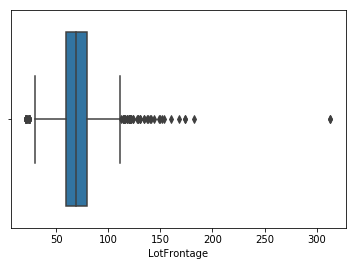

In [301]:
sns.boxplot(x=hp_total1['LotFrontage'])

In [302]:
outlier = hp_total1['LotFrontage'].quantile(0.99)
a = hp_total1[hp_total1['LotFrontage']>outlier]
a
#Outlier display

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan
Id,,,,,,,,,,,,,,,,,,,,,
198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0
232,60,RL,174.0,15138,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,...,0,0,0,0,0,0,0,1,0,0
808,70,RL,144.0,21384,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
910,60,RL,149.0,12589,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1108,60,RL,168.0,23257,Pave,NaN,IR3,HLS,AllPub,CulDSac,...,0,0,0,0,0,0,0,0,0,0
1128,20,RL,182.0,14572,Pave,NaN,IR3,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0


In [303]:
outliermin = hp_total1['LotFrontage'].quantile(0.02)
b = hp_total1[hp_total1['LotFrontage']<outliermin]
b
#I think these are the only lower outlier

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan
Id,,,,,,,,,,,,,,,,,,,,,
76,180,RM,21.0,1596,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
226,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
228,160,RM,21.0,1869,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
233,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
236,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
364,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
431,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
435,180,RM,21.0,1890,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
490,180,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0


In [304]:
hp_total1['LotArea'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      1300.0
0.1      5000.0
0.2      7078.4
0.3      8063.7
0.4      8793.4
0.5      9478.5
0.6     10198.2
0.7     11066.5
0.8     12205.8
0.9     14381.7
1.0    215245.0
Name: LotArea, dtype: float64

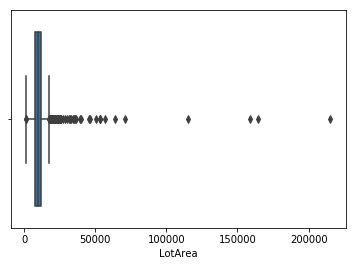

In [239]:
sns.boxplot(x=hp_total1['LotArea'])

In [305]:
outliermax1 = hp_total1['LotArea'].quantile(0.99)
c = hp_total1[hp_total1['LotArea']>outliermax1]
c

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan
Id,,,,,,,,,,,,,,,,,,,,,
54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,...,0,0,0,0,0,0,0,0,1,0
250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,...,0,0,0,0,0,0,0,0,0,0
272,20,RL,73.0,39104,Pave,NaN,IR1,Low,AllPub,CulDSac,...,0,0,0,0,0,0,0,0,0,0
314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,...,0,0,0,0,0,0,0,1,0,0
336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,...,0,0,0,0,0,0,0,1,0,0
385,60,RL,NaN,53107,Pave,NaN,IR2,Low,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0
452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
458,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,CulDSac,...,0,0,0,0,0,0,0,0,0,0
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0


In [316]:
hp_total1.to_pickle("Bird.pkl")